In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate


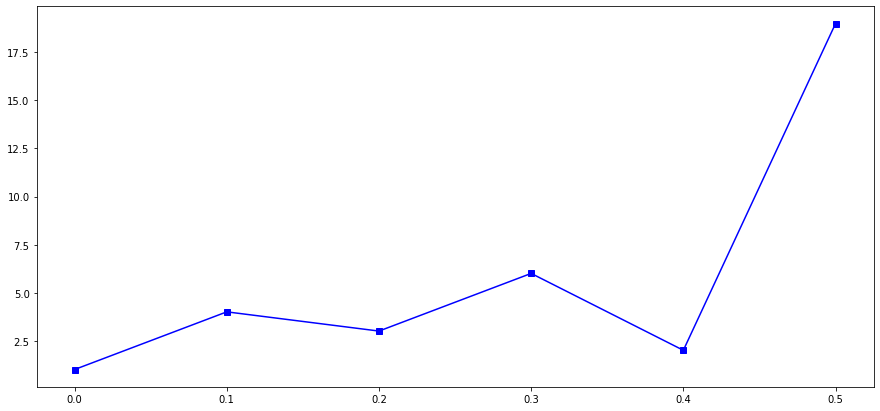

In [14]:
sampling_rate = 10

data = np.array([1, 4, 3, 6, 2, 19])

n_data = len(data)
time = np.arange(0, n_data) / sampling_rate
plt.figure(figsize=(15, 7))
plt.plot(time, data, 'bs-')


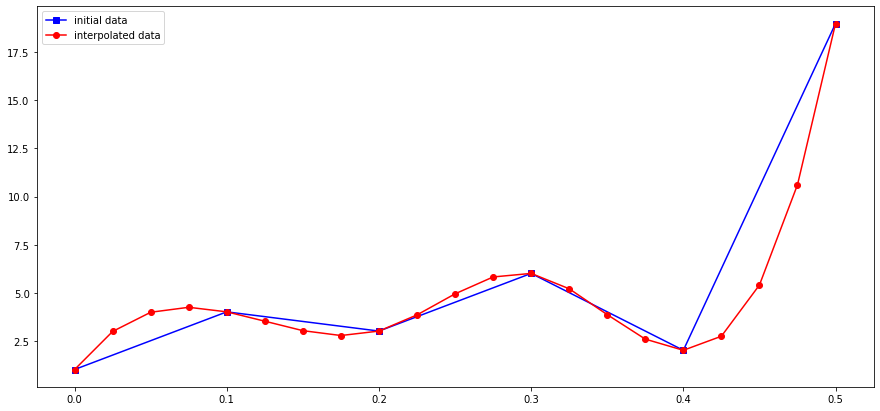

In [28]:
upsample_factor = 4
new_n_data = n_data * upsample_factor
new_time = np.arange(0, new_n_data) / (sampling_rate * upsample_factor)

# cut off time that is above 0.5 as we don't use it
new_time = new_time[new_time <= time[-1]]
new_sampling_rate = 1 / np.mean(np.diff(new_time))

interpolated_data = interpolate.griddata(time, data, new_time, method='cubic')
plt.figure(figsize=(15, 7))
plt.plot(time, data, 'bs-', label='initial data')
plt.plot(new_time, interpolated_data, 'ro-', label='interpolated data')
plt.legend()


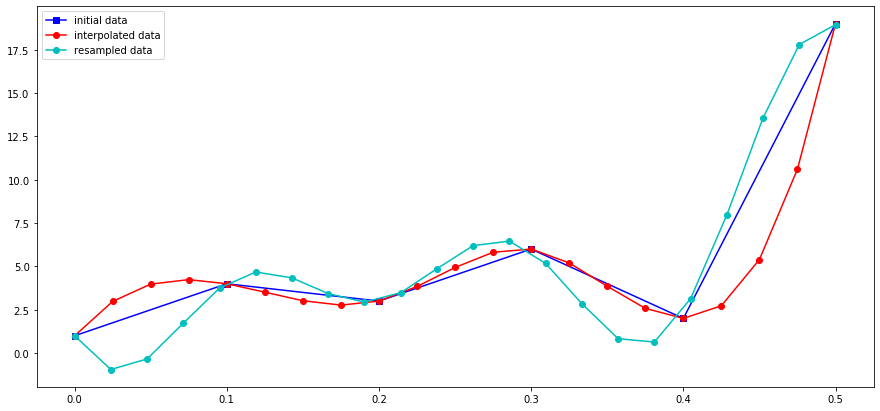

In [34]:
# Using Python Resampling function

new_sampling_rate = 42

new_n_data = int(n_data * (new_sampling_rate / sampling_rate))
resampled_data = signal.resample(data, new_n_data)
resampled_time = np.arange(0, len(resampled_data)) / new_sampling_rate
resampled_time = resampled_time[resampled_time <= time[-1]]

plt.figure(figsize=(15, 7))
plt.plot(time, data, 'bs-', label='initial data')
plt.plot(new_time, interpolated_data, 'ro-', label='interpolated data')
plt.plot(resampled_time, resampled_data[:len(resampled_time)], 'co-', label='resampled data')
plt.legend()
